<h1 align='center'>Heart Attack Analysis and Prediction</h1>

### Project Content
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing the variable](#3)
2. [First Organization](#4)
    * 2.1 [Required Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)

### 1. Introduction <a id = 1/></a>

#### 1.1 Examining the Project Topic <a id = 2></a>

- The medical name of a heart attack is “Myocardial infarction”.
- Heart attack in short; It is the occlusion of the vessel by plaque-like lesions filled with cholesterol and fat.
- The lesion is an abnormal conditions that occur in the organs where the disease is located.
- As a result of the blockage, the blood flow is completely cut off, and a heart attack that can lead to death occurs.

#### 1.2 Recognizing the variable<a id = 3></a>

**Variable defintions in the Dataset**
- age - age in years
- sex 
    - Value 1 = male; 
    - Value 0 = female
- cp - chest pain type 
    - Value 1 = typical angina; 
    - Value 2 = atypical angina; 
    - Value 3 = non-anginal pain; 
    - Value 0 = asymptomatic
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl 
    - Value 1 = true
    - Value 0 = false
- restecg - resting electrocardiographic results 
    - Value 1 = normal; 
    - Value 2 = having ST-T wave abnormality; 
    - Value 0 = hypertrophy
- thalach - maximum heart rate achieved
- exang - exercise induced angina 
    - Value 1 = yes 
    - Value 0 = no
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment 
    - Value 2 = upsloping; 
    - Value 1 = flat; 
    - Value 0 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 
    - Value 2 = normal; 
    - Value 1 = fixed defect; 
    - Value 3 = reversable defect
- num - the predicted attribute - diagnosis of heart disease (angiographic disease status) 
    - Value 0 = < diameter narrowing 
    - Value 1 = > 50% diameter narrowing

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Initial analysis

In [3]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.rename(columns={'thalachh':'thalach', 'exng':'exang', 'output':'target', 'restecg':'rest_ecg', 
                       'caa':'ca'}, inplace=True)
dataset.head(3)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       0
target      0
dtype: int64

## Preparation for exploratory data analysis (EDA)

### Examining missing values

In [8]:
dataset.isna().sum().to_frame(name='MissingValues')

,MissingValues
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

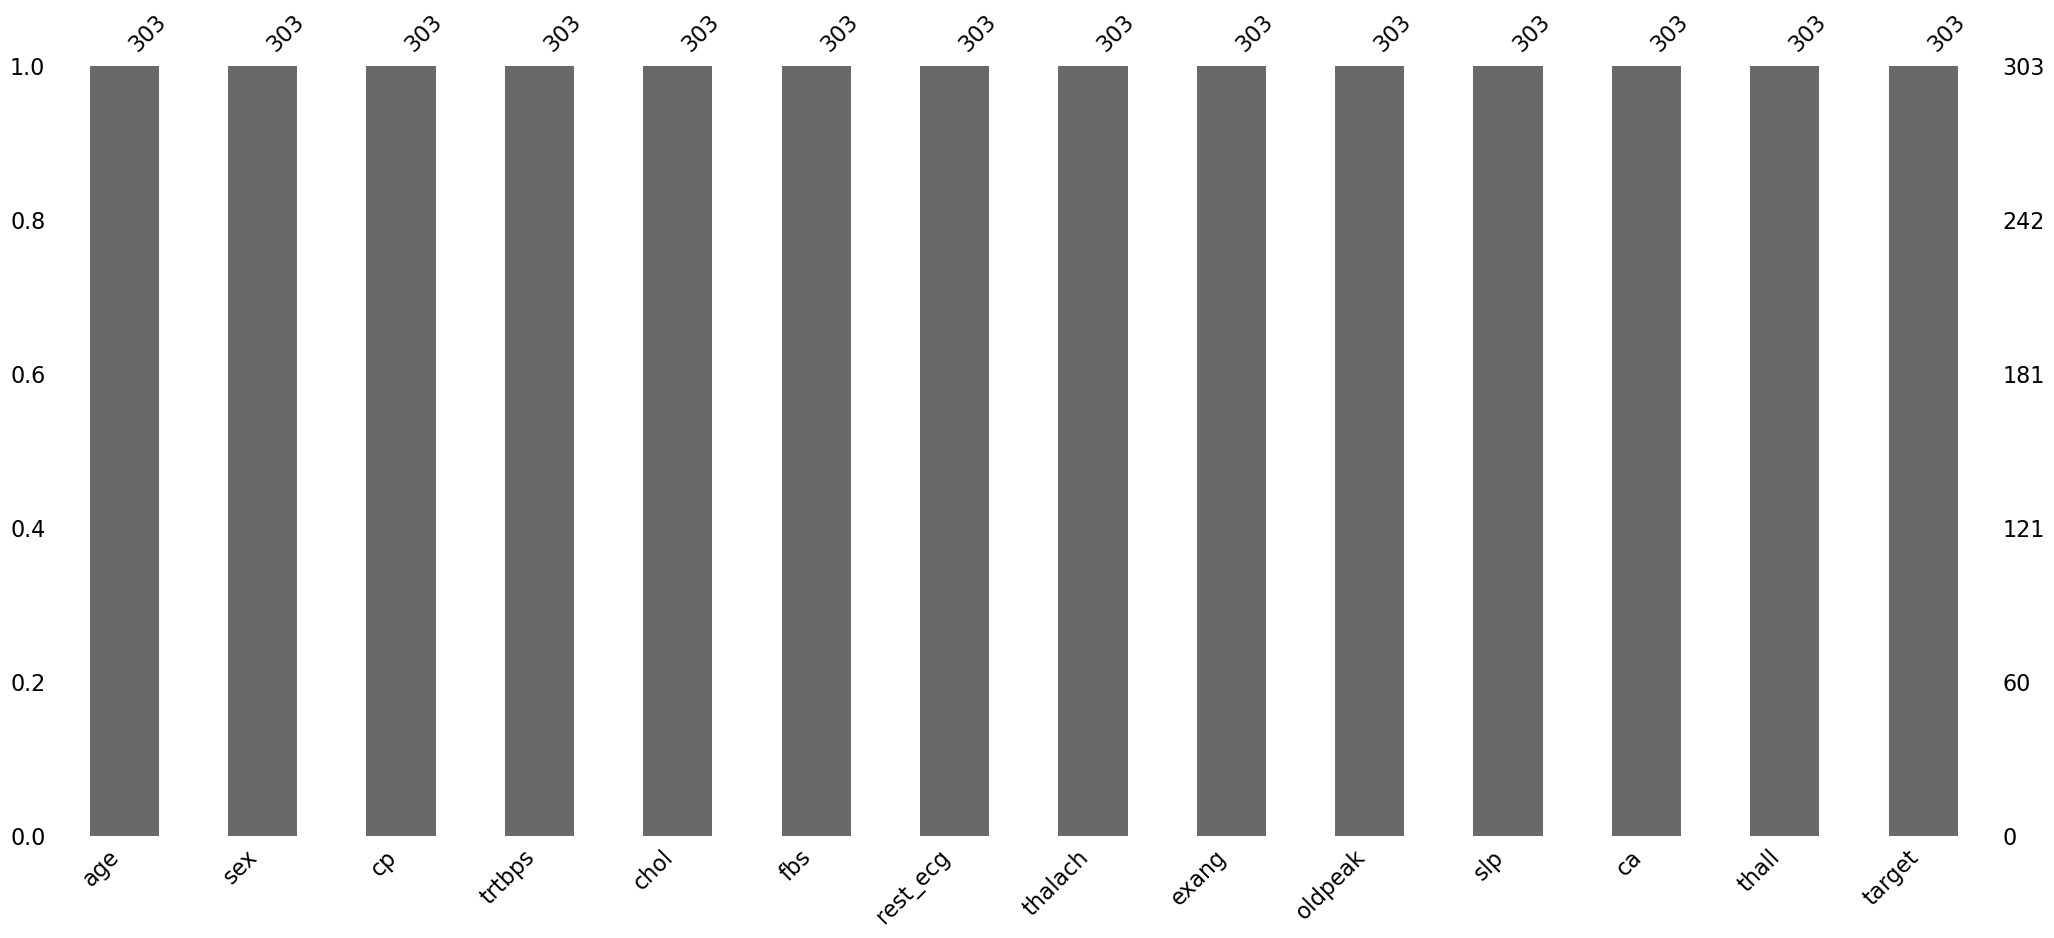

In [9]:
import missingno
missingno.bar(dataset)

### Examining unique values

In [10]:
dataset['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [11]:
dataset.value_counts().to_frame('Total Unique Values').sort_values(by='Total Unique Values', ascending=False)

Total Unique Values
age sex cp trtbps chol fbs rest_ecg thalach exang oldpeak slp ca thall target                     
38  1   2  138    175  0   1        173     0     0.0     2   4  2     1                         2
41  0   1  105    198  0   1        168     0     0.0     2   1  2     1                         1
35  0   0  138    183  0   1        182     0     1.4     2   0  2     1                         1
    1   0  120    198  0   1        130     1     1.6     1   0  3     0                         1
           126    282  0   0        156     1     0.0     2   0  3     0                         1
...                                                                                            ...
71  0   2  110    265  1   0        130     0     0.0     2   1  2     1                         1
74  0   1  120    269  0   0        121     1     0.2     2   1  2     1                         1
76  0   2  140    197  0   2        116     0     1.1     1   0  2     1                         1
68  0   2  120    211  0   0        115     0     1.5     1   0  2     1                         1
77  1   0  125    304  0   0        162     1     0.0     2   3  2     0                         1

[302 rows x 1 columns]

In [12]:
unique_number = []
for i in dataset.columns:
    x = dataset[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index=dataset.columns, columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [13]:
print(unique_number)

[np.int64(41), np.int64(2), np.int64(4), np.int64(49), np.int64(152), np.int64(2), np.int64(3), np.int64(91), np.int64(2), np.int64(40), np.int64(3), np.int64(5), np.int64(4), np.int64(2)]


### Separating Variables (Numeric/Categorical)

In [14]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categorical_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slp", "ca", "thall", "target"]

### Statistical Analysis on dataset (only numeric)

In [15]:
dataset[['age', 'trtbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Statistical Analysis (Age)

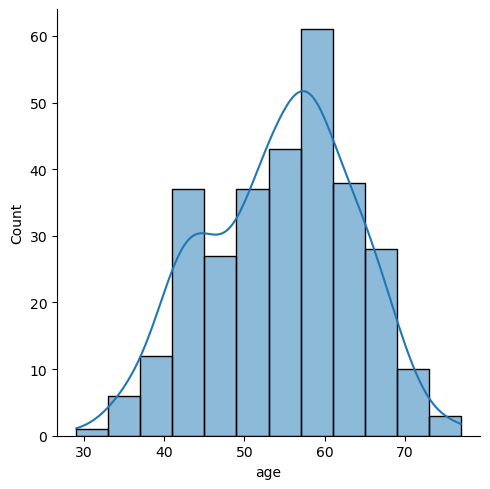

In [16]:
sns.displot(dataset['age'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='age'>

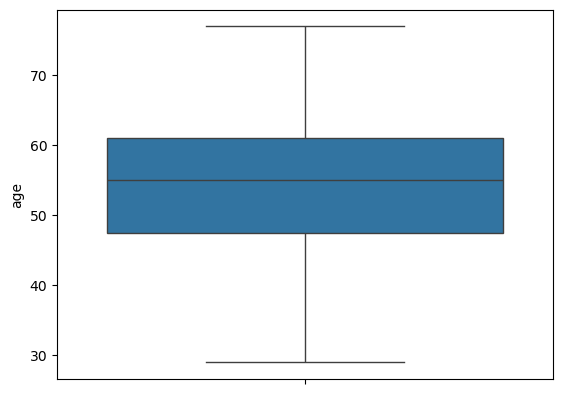

In [17]:
sns.boxplot(dataset['age'])

### Statistical analysis (trtbps)

In [18]:
dataset['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

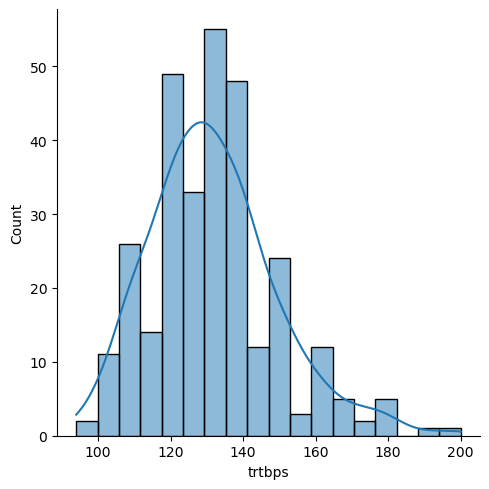

In [19]:
sns.displot(dataset['trtbps'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='trtbps'>

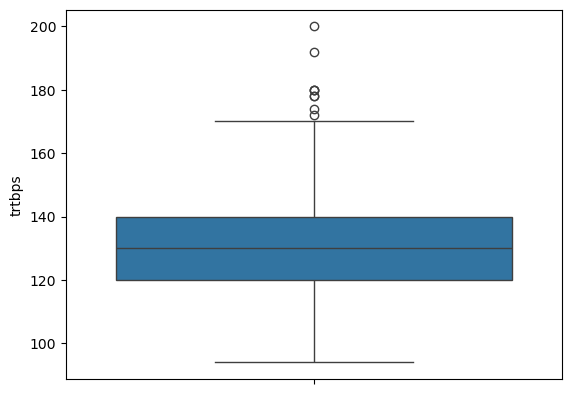

In [20]:
sns.boxplot(dataset['trtbps'])

### Statistical Analysis (chol)

In [21]:
dataset['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

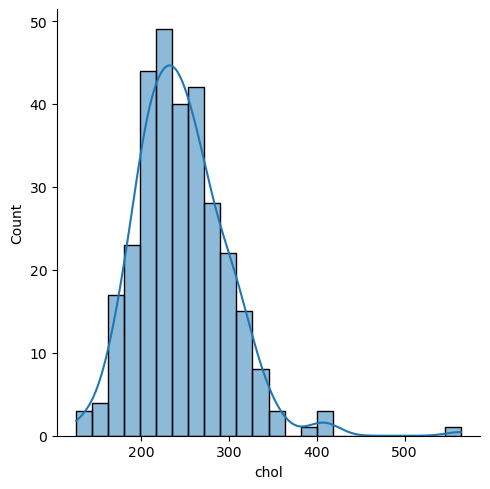

In [22]:
sns.displot(dataset['chol'], kind='hist', kde=True, linewidth=1, edgecolor='k')

<Axes: ylabel='chol'>

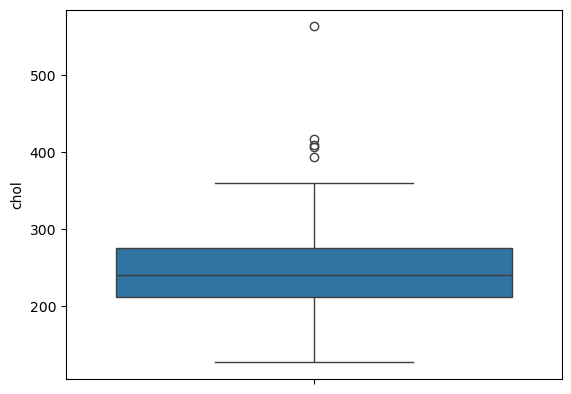

In [23]:
sns.boxplot(dataset['chol'])

### Statistical analysis (thalach)

In [24]:
dataset['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

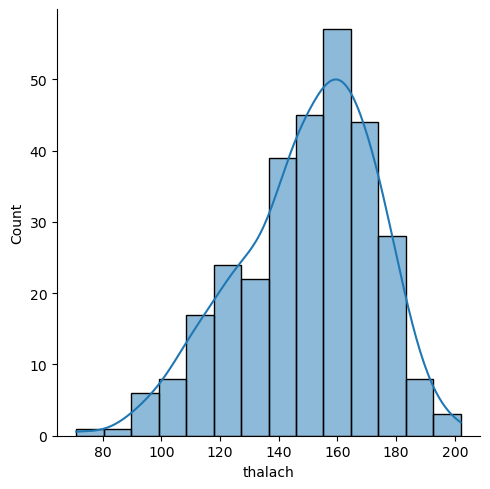

In [25]:
sns.displot(dataset['thalach'], kind='hist', kde='true')

<Axes: ylabel='thalach'>

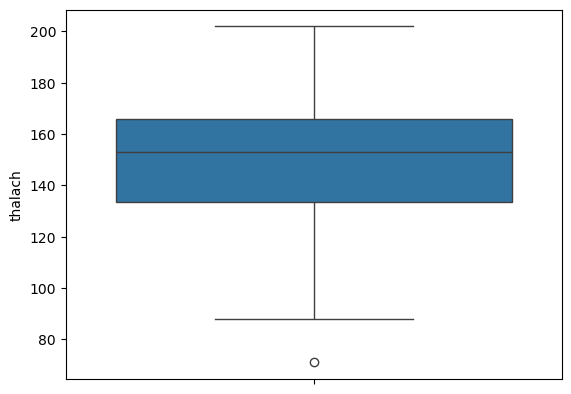

In [26]:
sns.boxplot(dataset['thalach'])

### Statistical analysis (oldpeak)

In [27]:
dataset['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

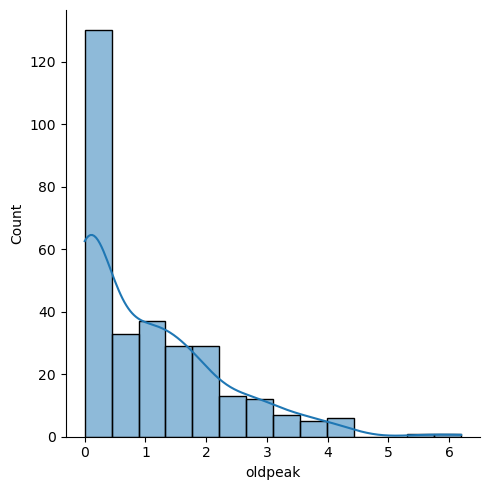

In [28]:
sns.displot(dataset['oldpeak'], kind='hist', kde=True)

<Axes: ylabel='oldpeak'>

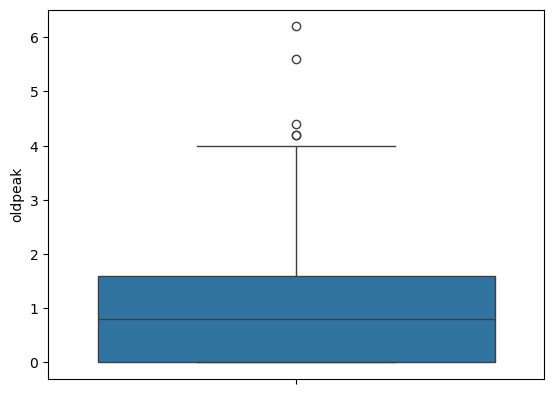

In [29]:
sns.boxplot(dataset['oldpeak'])

## Univariate Analysis

### Numerical features using loop

In [30]:
numeric_axis_map = {'age':'Age of the Patient', 'trtbps':'Resting Blood Pressure', 'chol':'Cholesterol', 
                   'thalach':'Maximum Heart Rate Achieved', 'oldpeak':'ST Depression'}

<Figure size 2000x1000 with 0 Axes>

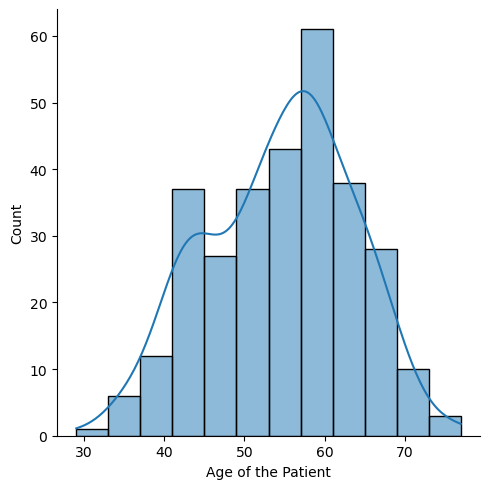

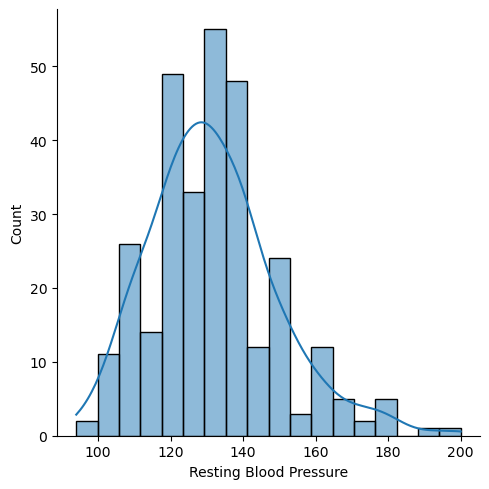

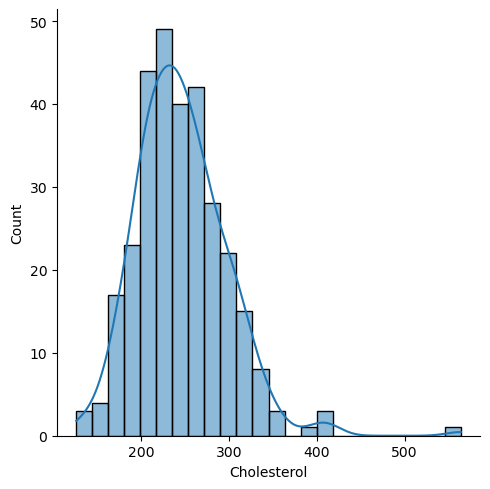

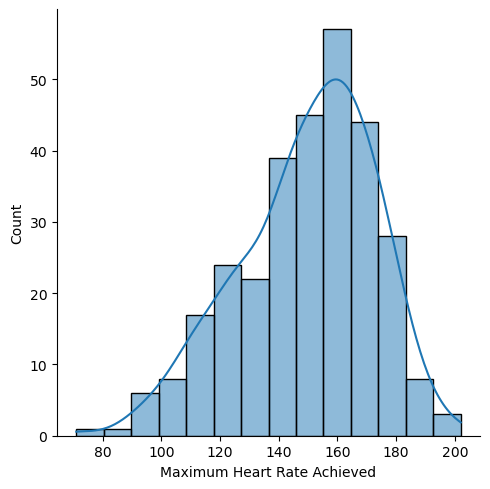

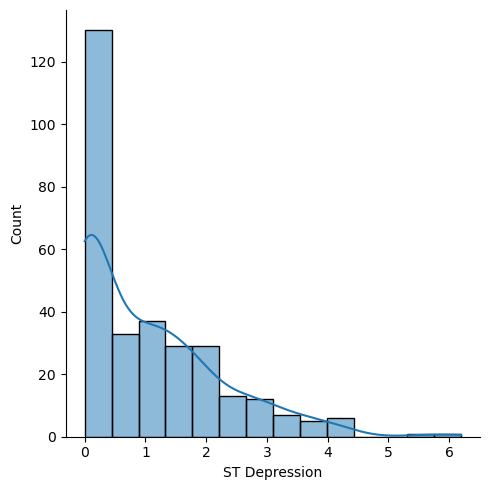

In [31]:
plt.figure(figsize=(20,10))
for numerical_feature in numeric_var:
    sns.displot(dataset[numerical_feature], kind='hist', kde=True, linewidth=1, edgecolor='k')
    plt.xlabel(numeric_axis_map[numerical_feature])
    plt.show()

### Categorical Features (Bi-Variate Analysis)

<Axes: xlabel='sex', ylabel='count'>

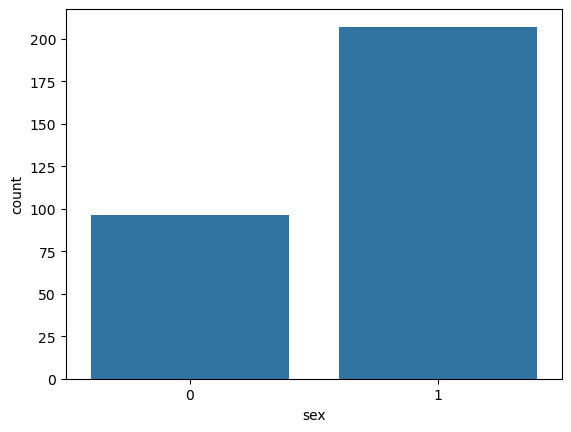

In [32]:
sns.countplot(dataset, x='sex')

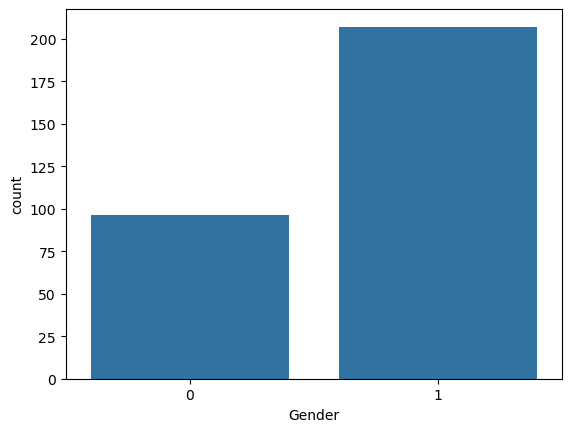

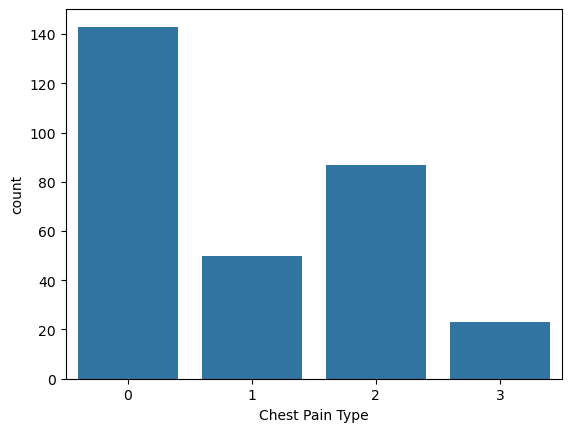

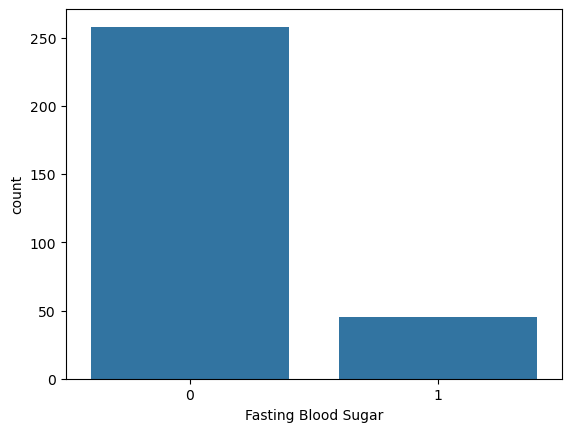

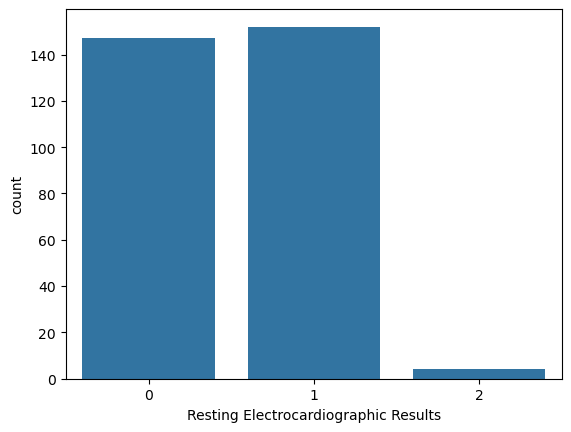

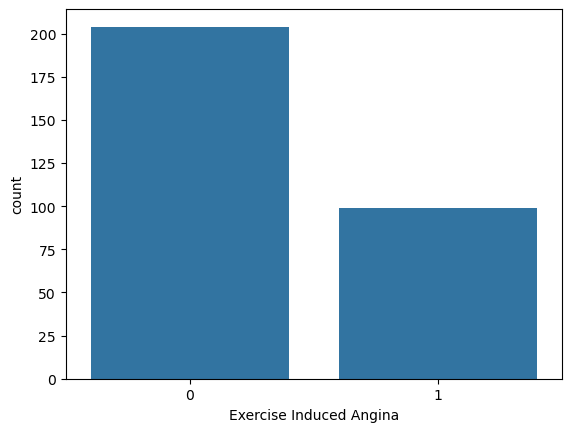

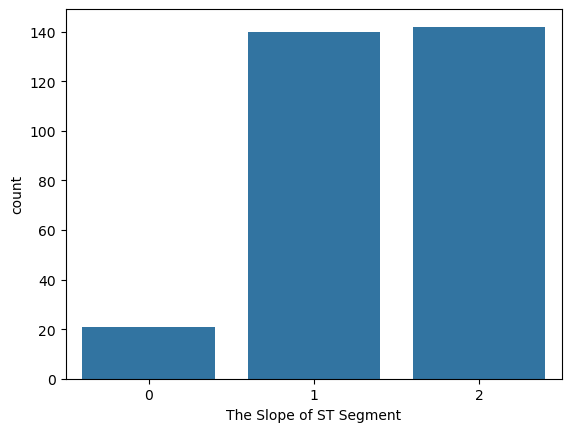

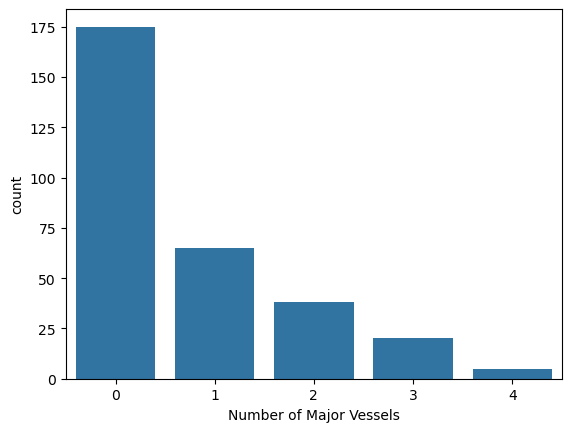

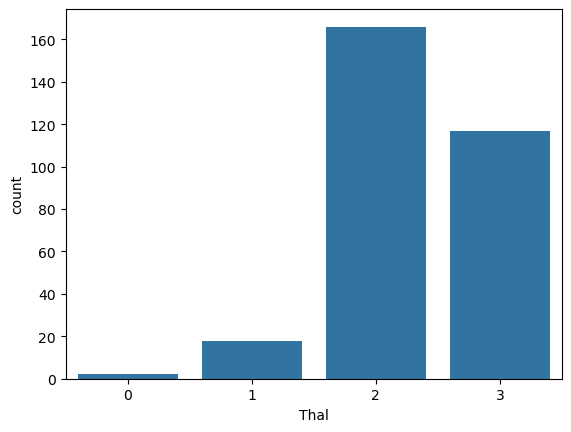

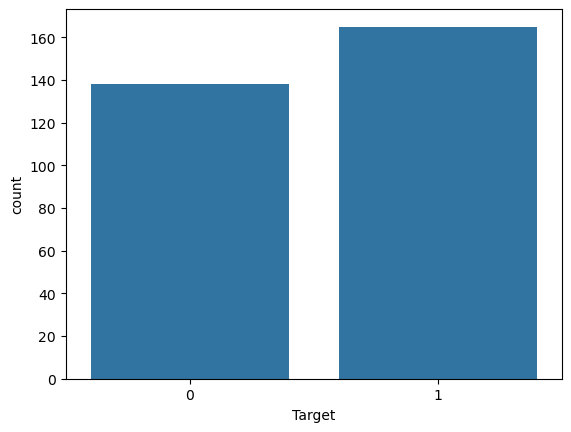

In [33]:
categorical_axis_map = {"sex":'Gender', "cp":'Chest Pain Type', "fbs":'Fasting Blood Sugar', 
                        "rest_ecg":'Resting Electrocardiographic Results', "exang":'Exercise Induced Angina', 
                        "slp":'The Slope of ST Segment', "ca":'Number of Major Vessels', "thall":'Thal', 
                        "target":'Target'}
for categorical_features in categorical_var:
    sns.countplot(dataset, x=categorical_features)
    plt.xlabel(categorical_axis_map[categorical_features])
    plt.show()


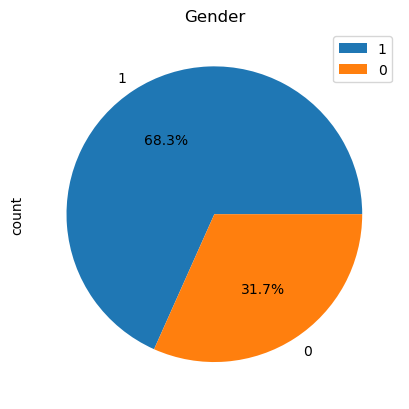

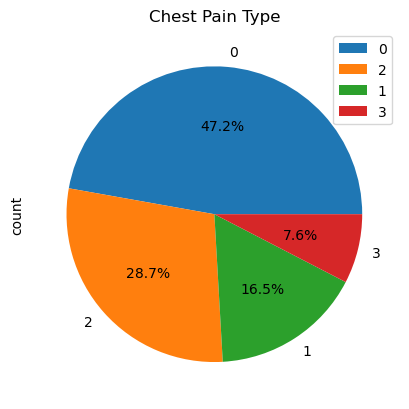

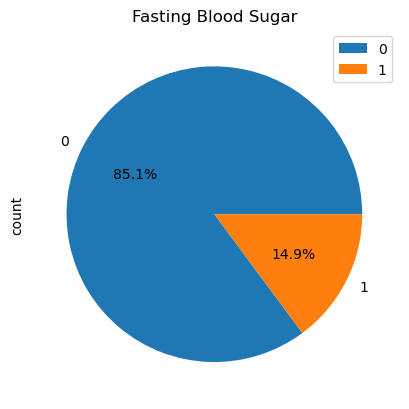

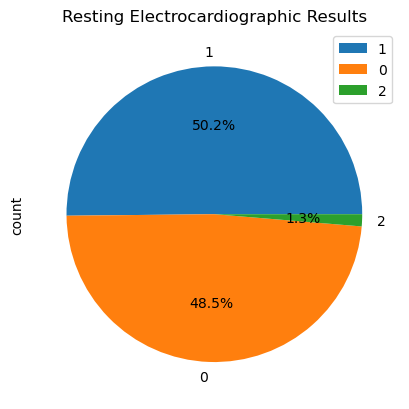

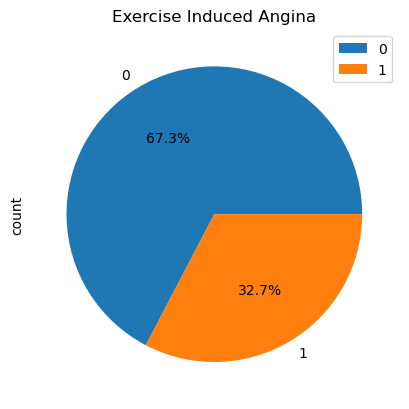

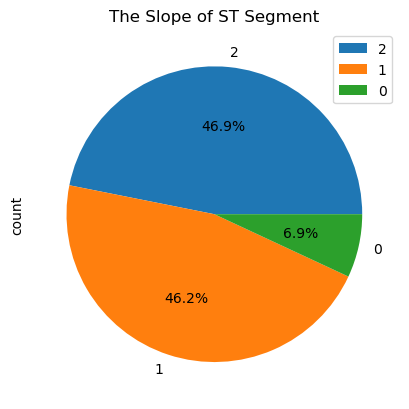

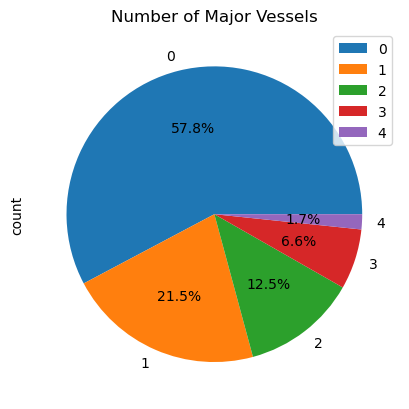

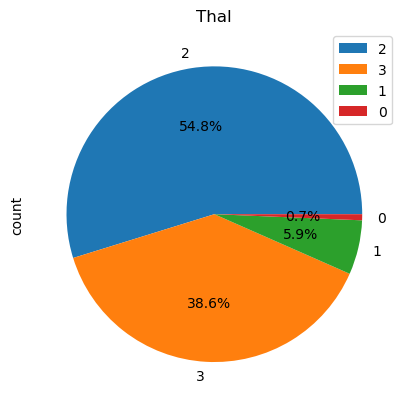

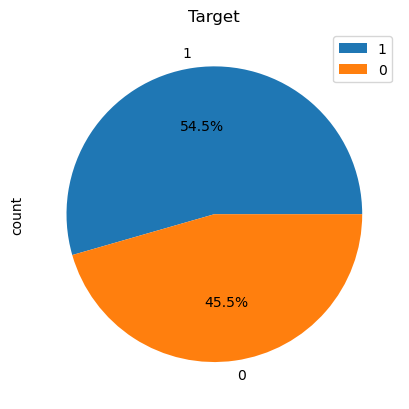

In [34]:
for categorical_features in categorical_var:
    dataset[categorical_features].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(categorical_axis_map[categorical_features])
    plt.legend()
    plt.show()

### Handling missing values

In [35]:
dataset[dataset['thall'] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [36]:
# dataset['thall'].replace({0: np.nan}, inplace=True) commenting due to warning
dataset.replace({'thall':{0:np.nan}}, inplace=True)

In [37]:
dataset['thall'].value_counts()

thall
2.0    166
3.0    117
1.0     18
Name: count, dtype: int64

In [38]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       2
target      0
dtype: int64

In [39]:
dataset.iloc[[48, 281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [40]:
dataset.fillna(2, inplace=True)

In [41]:
dataset.iloc[[48, 281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [42]:
dataset['thall'] = dataset['thall'].astype('int64')

In [43]:
dataset.iloc[[48,281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slp,ca,thall,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [44]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slp         0
ca          0
thall       0
target      0
dtype: int64

## Bivariate analysis

### Numerical Variable - Target

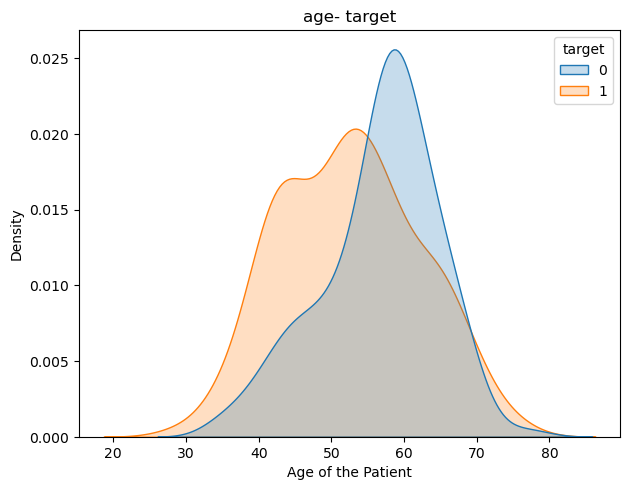

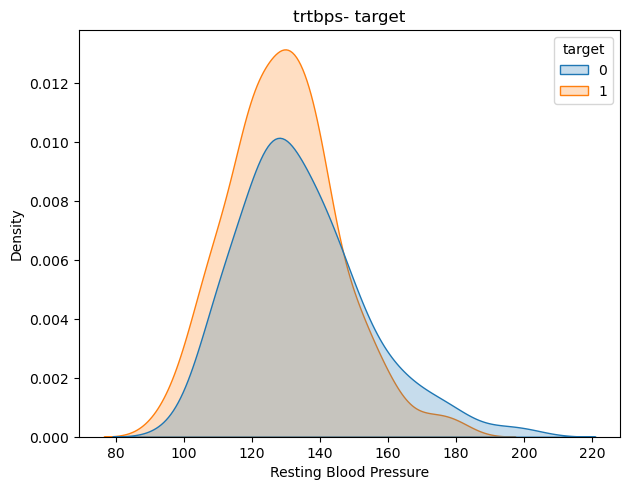

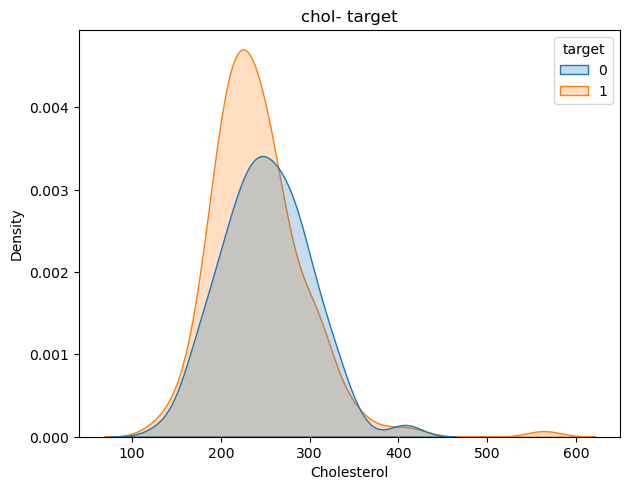

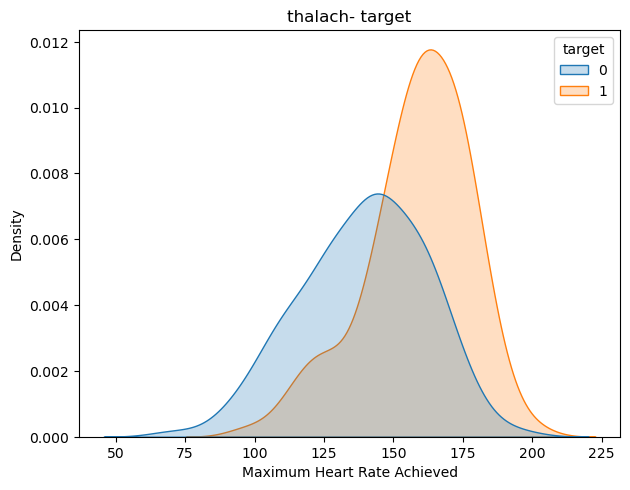

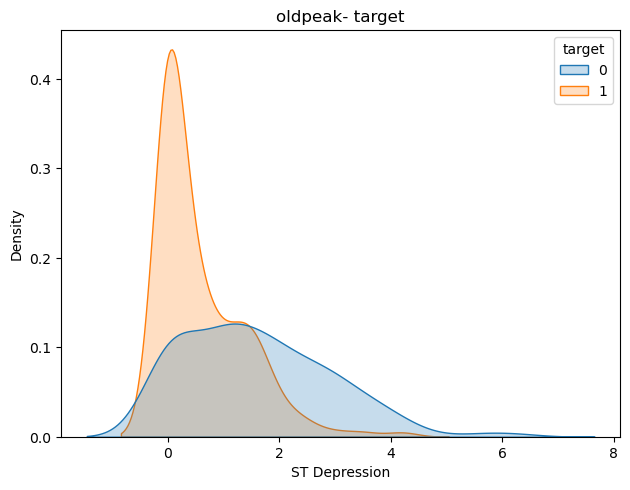

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_81105/302586023.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dataset, x=dataset[numerical_feature], hue='target', fill=True)


KeyError: 'target'

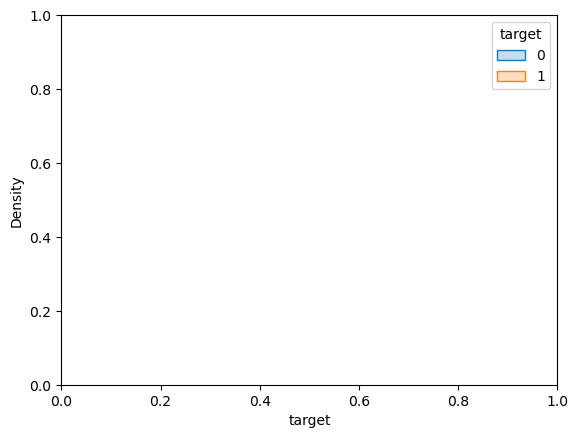

In [82]:
for numerical_feature in numeric_var:
    sns.kdeplot(dataset, x=dataset[numerical_feature], hue='target', fill=True)
    plt.xlabel(numeric_axis_map[numerical_feature])
    plt.tight_layout()
    plt.title(numerical_feature + '- target')
    plt.show()

In [69]:
dataset[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


<Axes: >

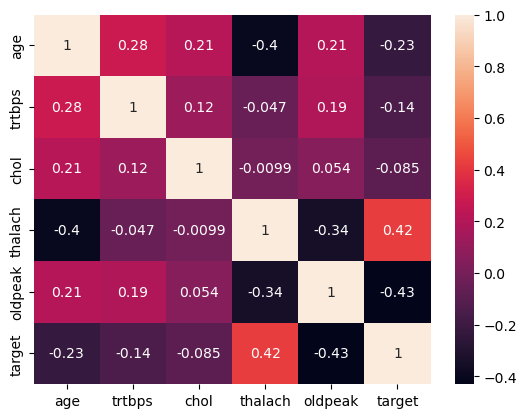

In [70]:
sns.heatmap(dataset[numeric_var].corr(), annot=True)

In [72]:
dataset[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


### Categorical variable - Target

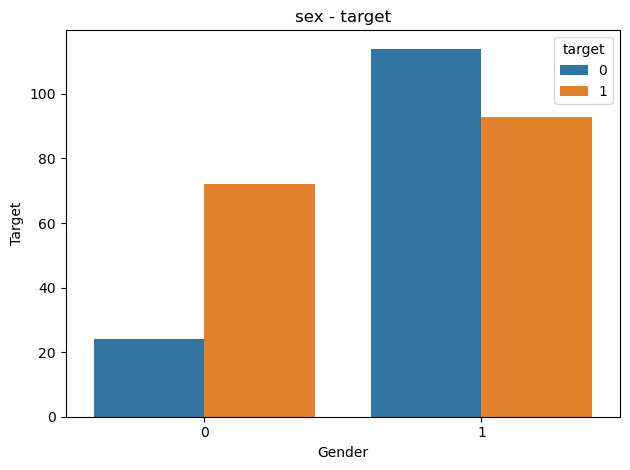

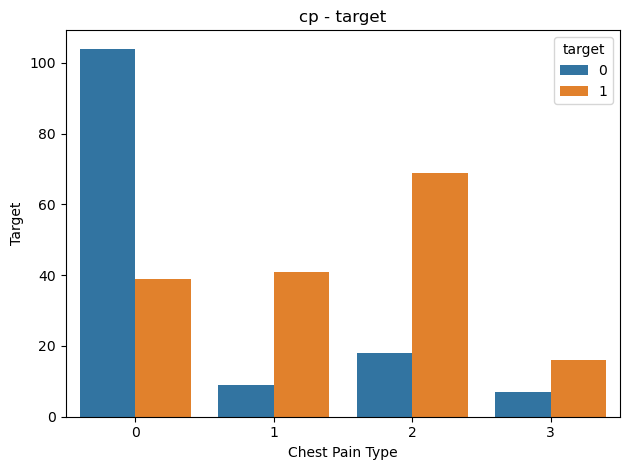

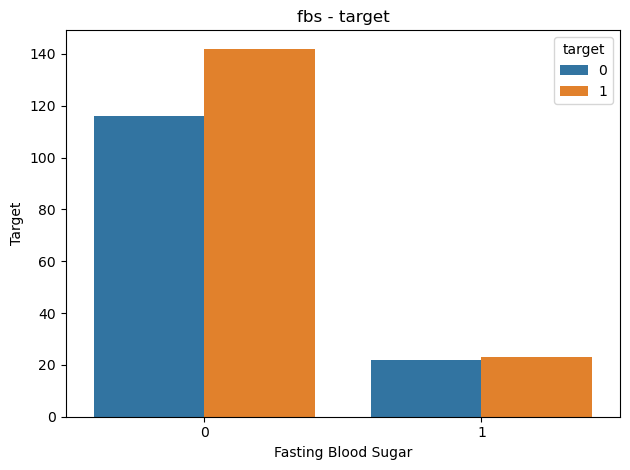

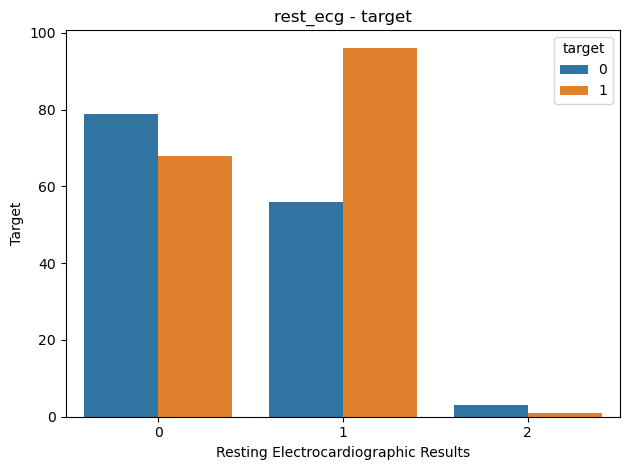

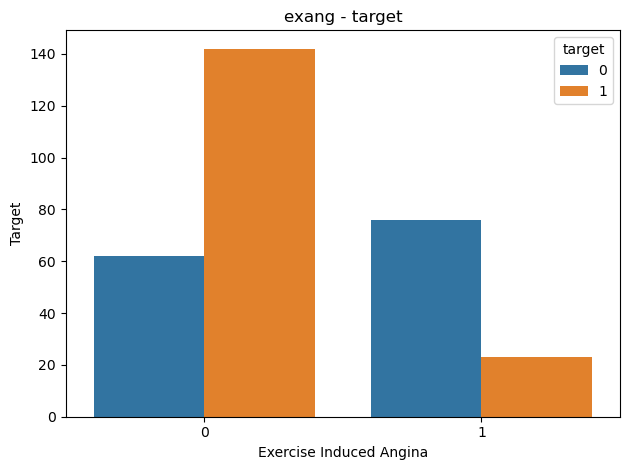

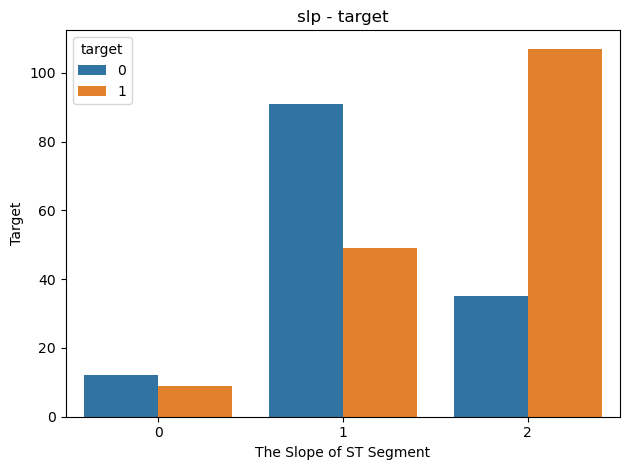

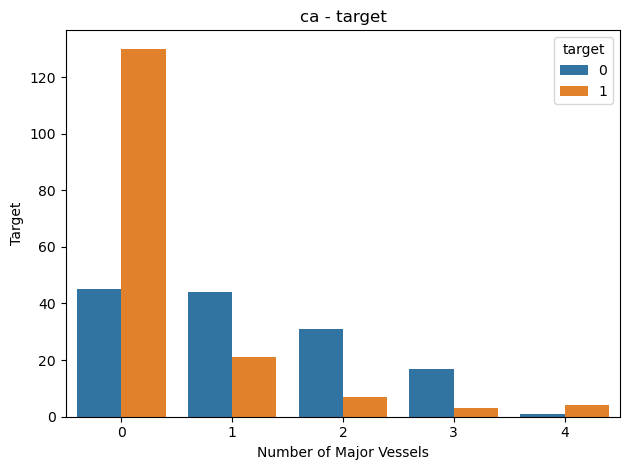

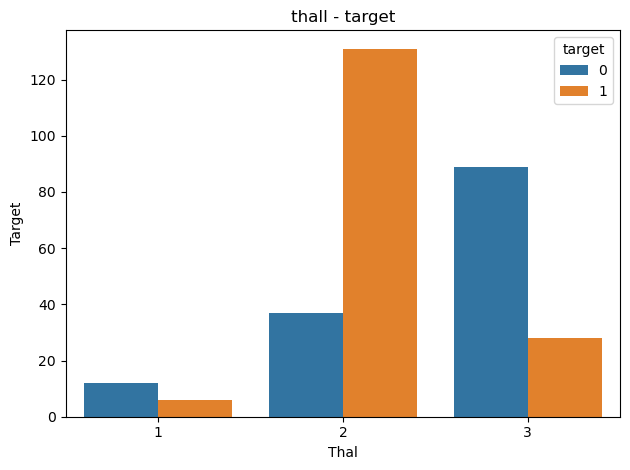

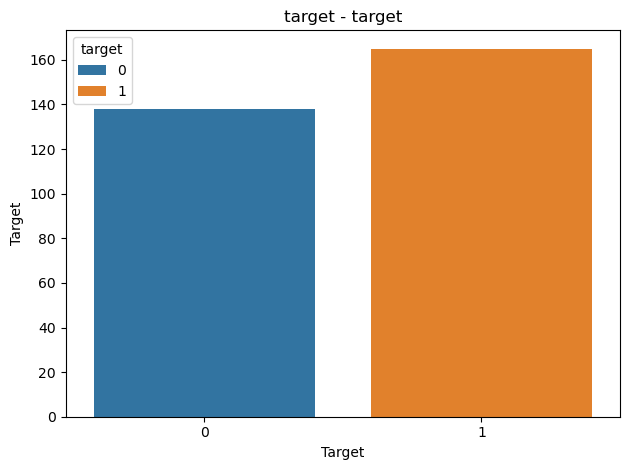

In [83]:
for categorical_feature in categorical_var:
    sns.countplot(dataset, x=dataset[categorical_feature], hue='target')
    plt.xlabel(categorical_axis_map[categorical_feature])
    plt.ylabel('Target')
    plt.title(categorical_feature + ' - target')
    plt.tight_layout()
    plt.show()

In [84]:
dataset[categorical_var].corr()

,sex,cp,fbs,rest_ecg,exang,slp,ca,thall,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slp,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thall,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [89]:
dataset[categorical_var].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slp,0.345877
ca,-0.391724
thall,-0.363322
target,1.000000
